Task 1: Plot PDFs
Task 2: Raw Sampling Histograms
Task 3: Averaging Effect
Task 4: Variance Scaling
Uniform: Original variance = 1.3333
  m=1, Variance of mean = 1.3571, Expected = 1.3333
  m=2, Variance of mean = 0.6729, Expected = 0.6667
  m=10, Variance of mean = 0.1419, Expected = 0.1333
  m=100, Variance of mean = 0.0121, Expected = 0.0133
----------------------------------------
Normal: Original variance = 1.0000
  m=1, Variance of mean = 1.0420, Expected = 1.0000
  m=2, Variance of mean = 0.5127, Expected = 0.5000
  m=10, Variance of mean = 0.1066, Expected = 0.1000
  m=100, Variance of mean = 0.0099, Expected = 0.0100
----------------------------------------
Lognormal: Original variance = 0.3647
  m=1, Variance of mean = 0.4113, Expected = 0.3647
  m=2, Variance of mean = 0.1742, Expected = 0.1823
  m=10, Variance of mean = 0.0366, Expected = 0.0365
  m=100, Variance of mean = 0.0037, Expected = 0.0036
----------------------------------------
Gumbel-1: Original variance = 1.644

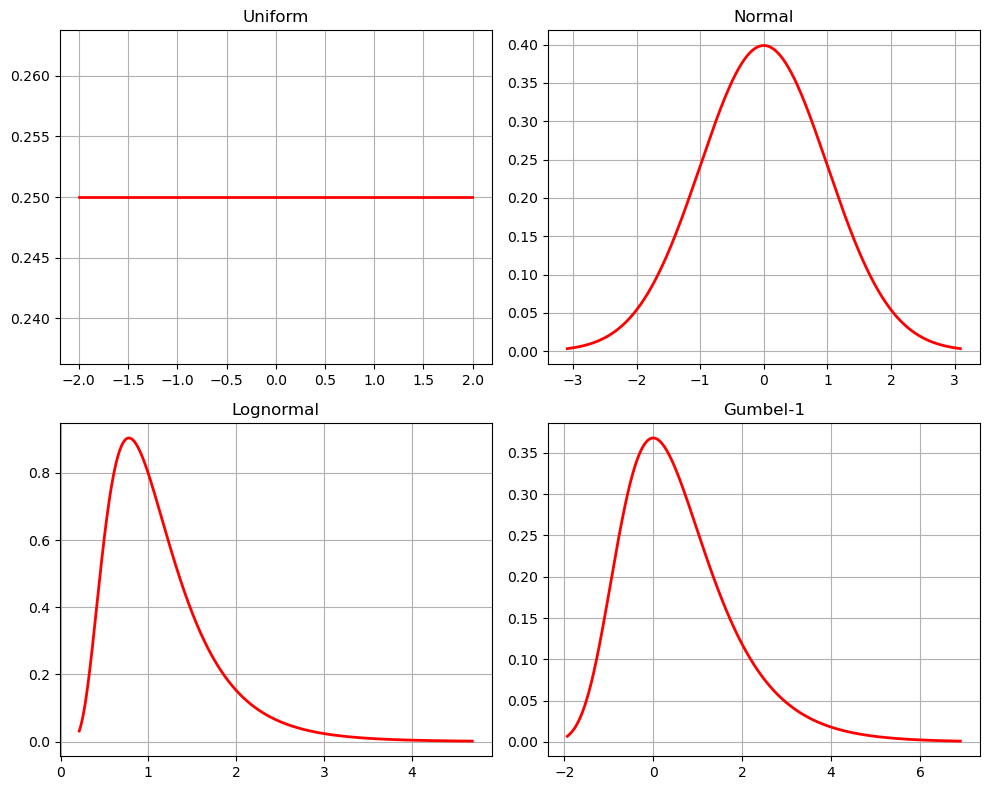

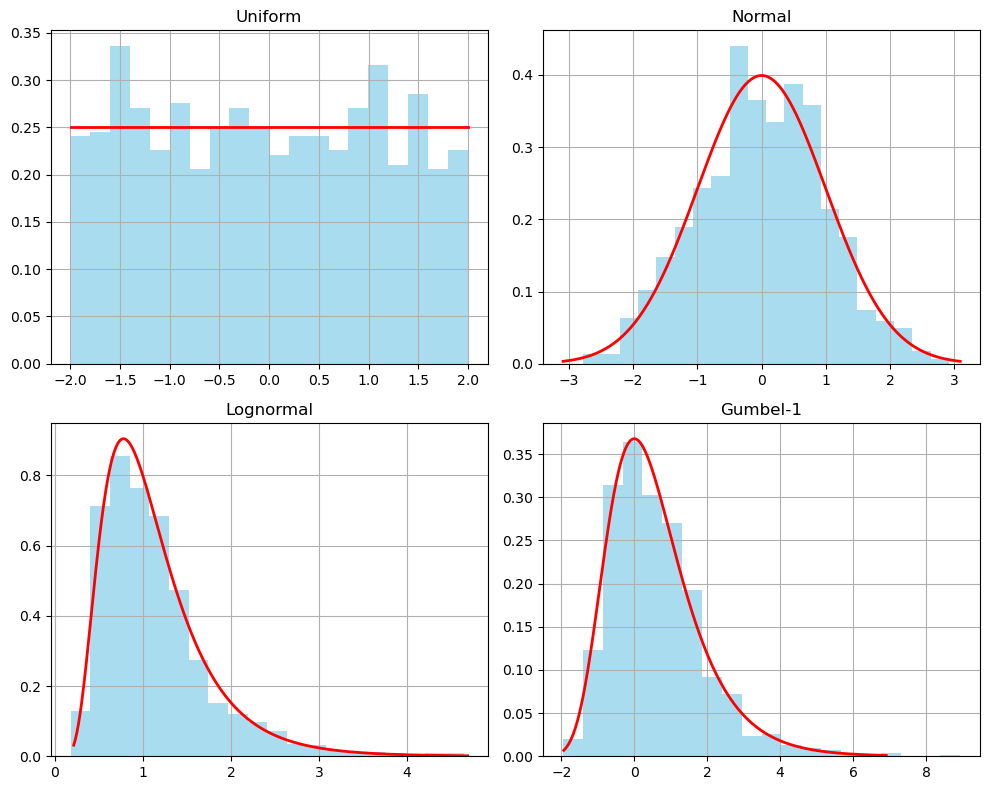

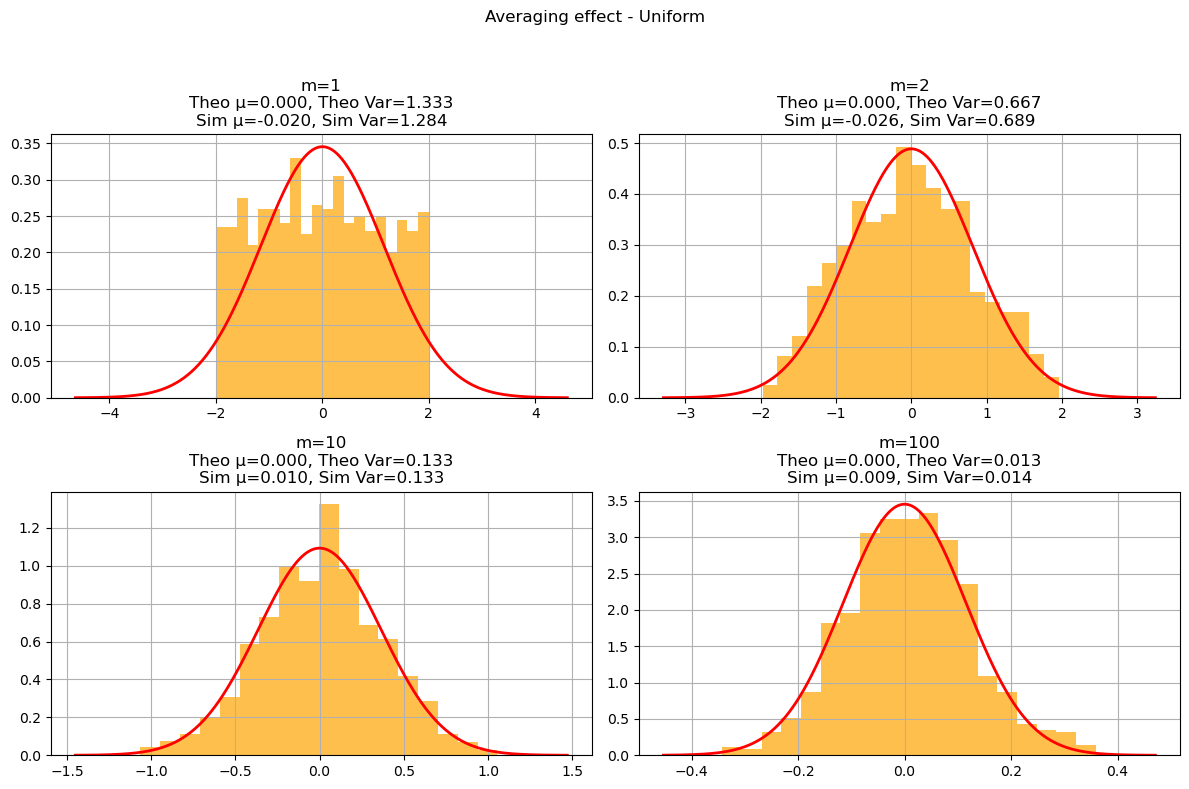

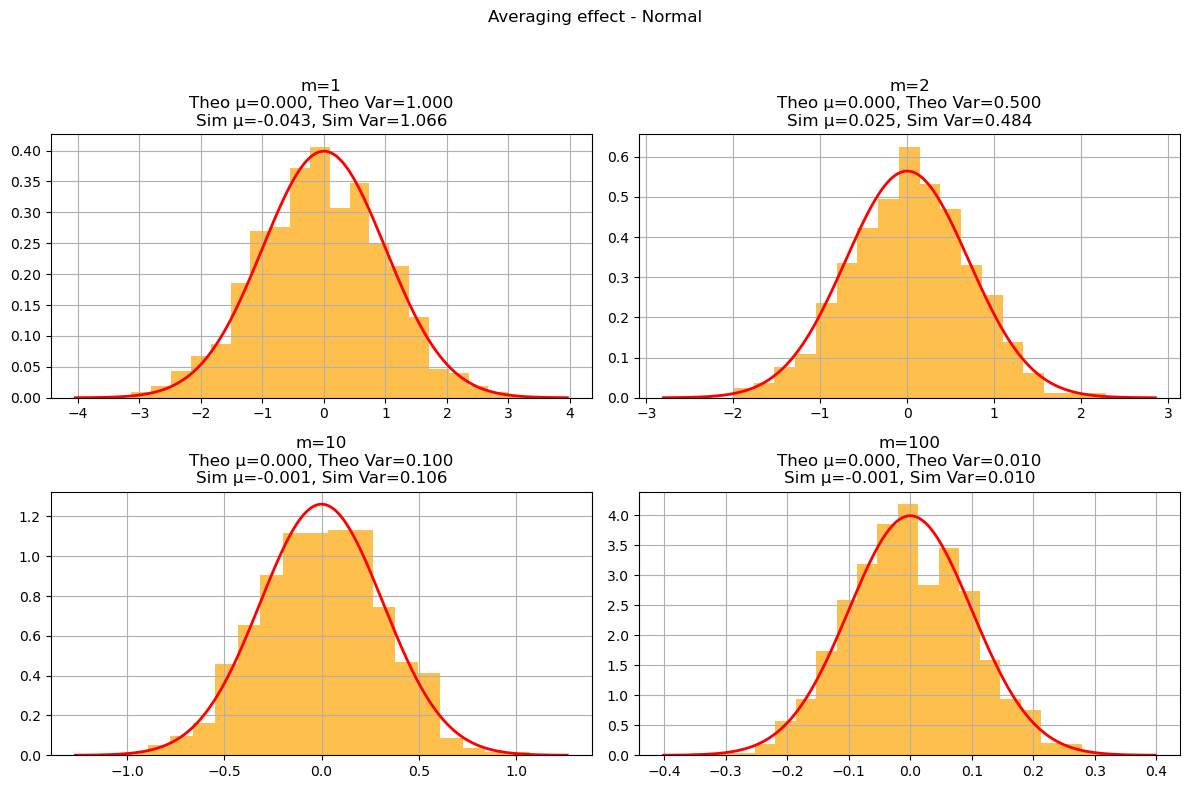

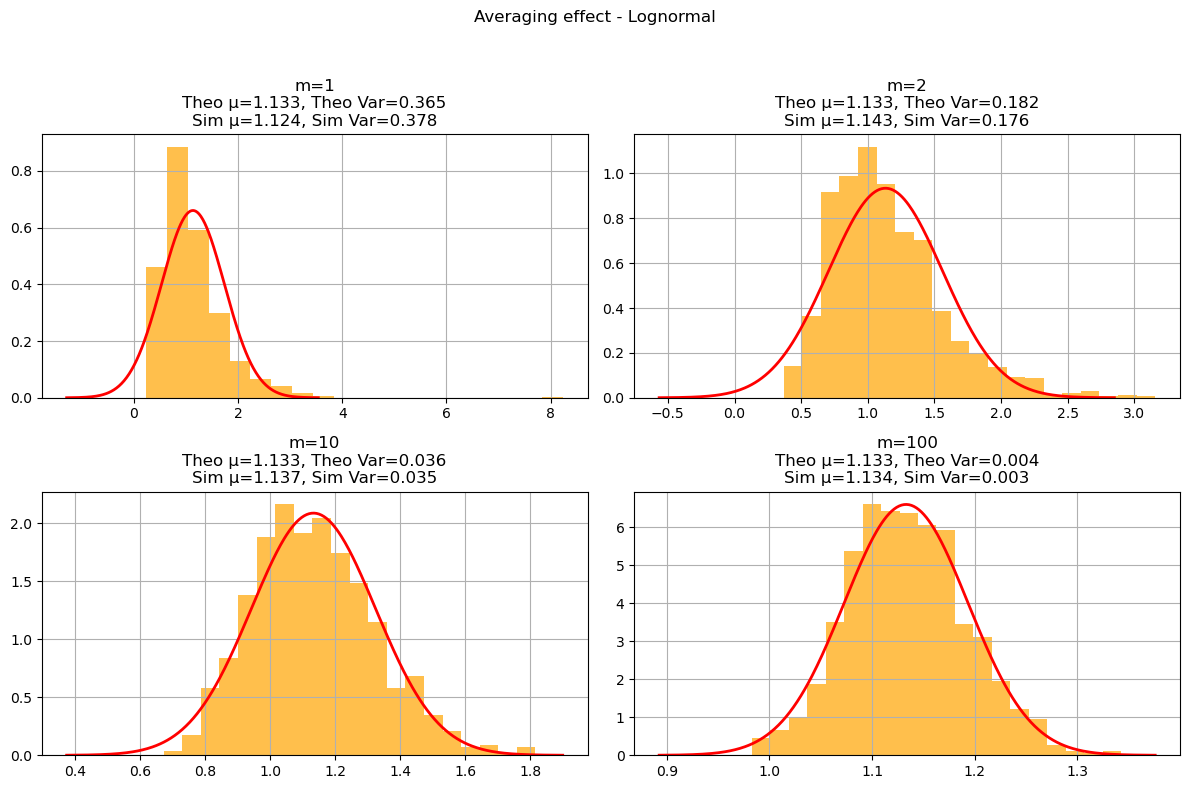

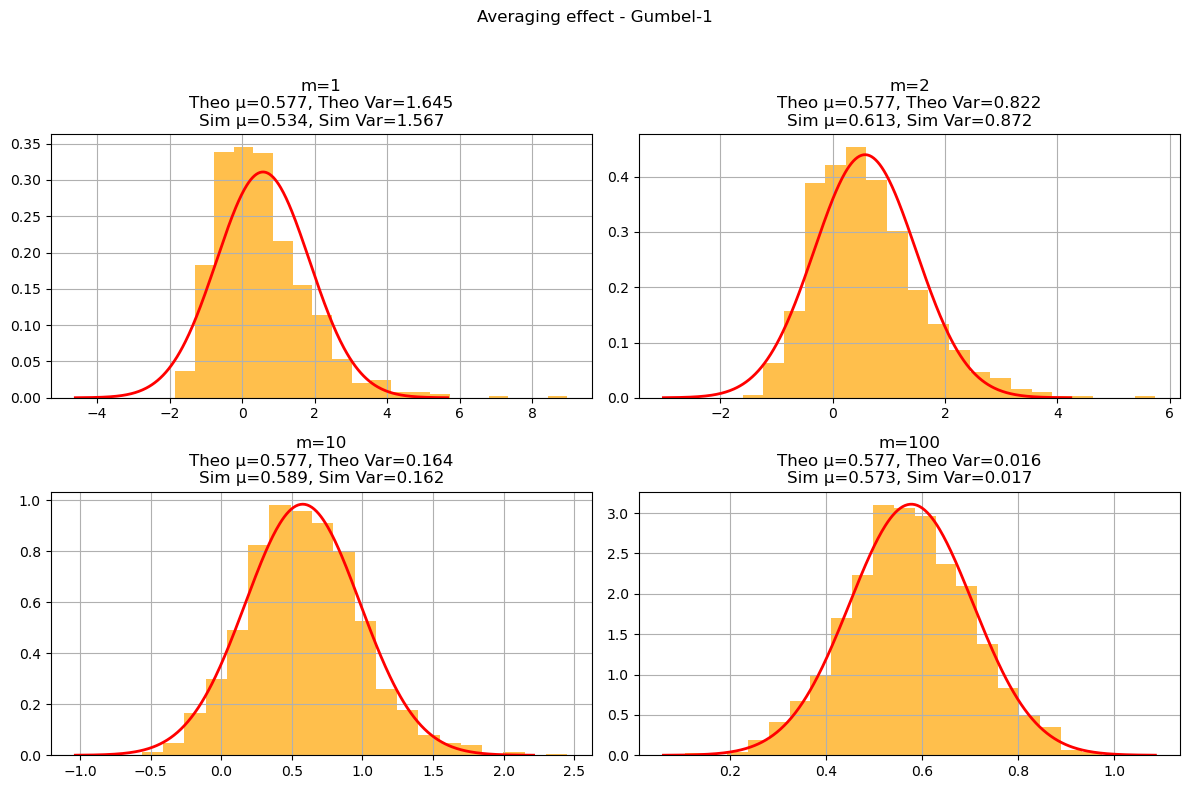

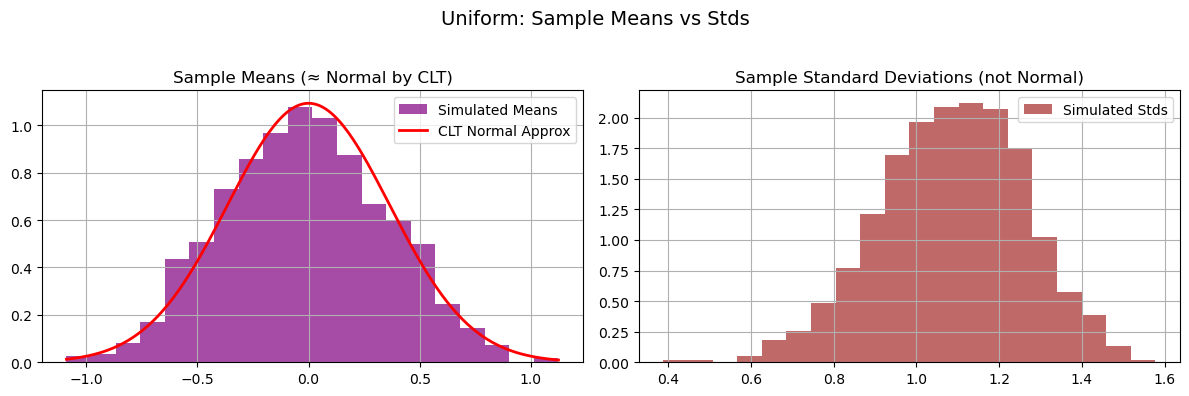

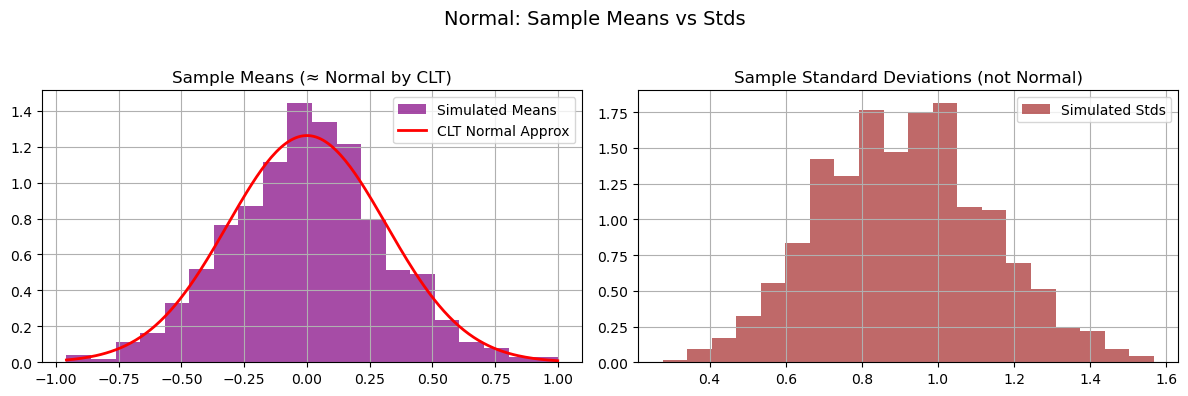

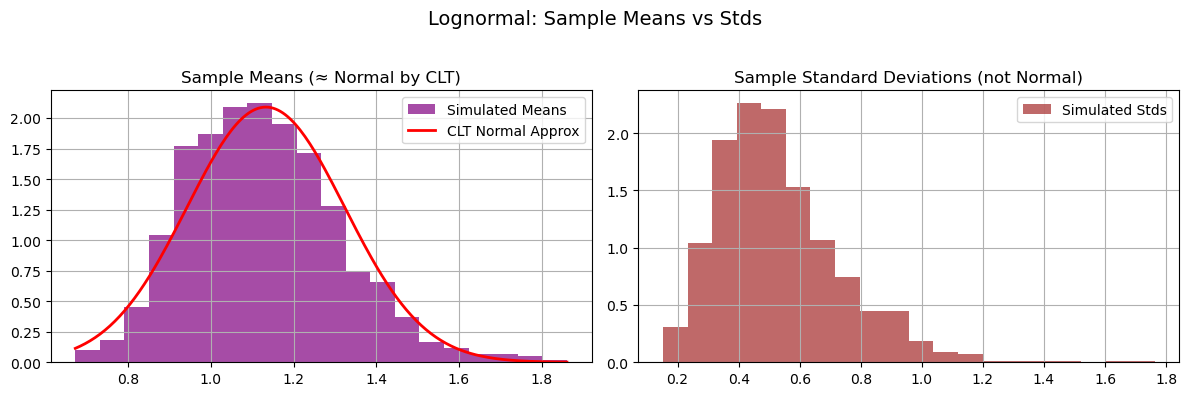

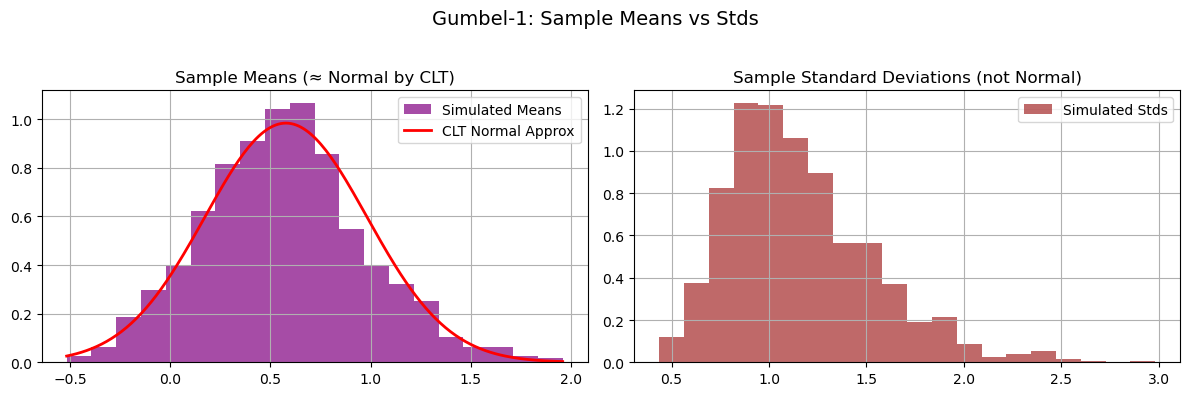

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, lognorm, gumbel_r

# ================================
# Define distributions with fixed parameters
# ================================
dists = {
    "Uniform": uniform(loc=-2, scale=4),           # uniform between -2 and 2

    # WRITE_YOUR_CODE HERE TO DEFINE OTHER DISTRIBUTIONS WITH FIXED PARAMETERS
    "Normal":  norm(loc=0, scale=1),                                     # standard normal
    "Lognormal":  lognorm(s=0.5, scale=1),                                  # median = 1
    "Gumbel-1": gumbel_r(loc=0, scale=1),                                    # Gumbel distribution
    # this code block ends here

}

# ================================
# Task 1: Explore distributions (PDFs)
# ================================
def task1_plot_pdfs(N=1000):
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    axes = axes.flatten()

    for ax, (name, dist) in zip(axes, dists.items()):
        x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), N)

        # WRITE_YOUR_CODE HERE TO DEFINE y AS THE PDF VALUES
        y = dist.pdf(x)
        # this code block ends here

        ax.plot(x, y, 'r-', lw=2)
        ax.set_title(name)
        ax.grid(True)

    plt.tight_layout()

# ================================
# Task 2: Raw sampling (m=1)
# ================================
def task2_histograms(N=1000):
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    axes = axes.flatten()

    for ax, (name, dist) in zip(axes, dists.items()):
        samples = dist.rvs(size=N)
        ax.hist(samples, bins=20, density=True, alpha=0.7, color='skyblue')

        # WRITE_YOUR_CODE HERE TO OVERLAY PDF ON EACH HISTOGRAM
        x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 500)
        y = dist.pdf(x)
        ax.plot(x, y, 'r-', lw=2)
        # this code block ends here

        ax.set_title(name)
        ax.grid(True)

    plt.tight_layout()

# ================================
# Task 3: Averaging effect (m>1)
# ================================
def task3_averaging(N=1000, m_list=[1, 2, 10, 100]):
    for name, dist in dists.items():

        fig, axes = plt.subplots(2, 2, figsize=(12,8))
        fig.suptitle(f"Averaging effect - {name}")

        for ax, m in zip(axes.flat, m_list):
            samples = np.mean(dist.rvs(size=(N,m)), axis=1)

            # WRITE_YOUR_CODE HERE TO FIND SIMULATED MEAN, VAR FROM SAMPLES
            # Simulated mean, var, and std of selected samples
            sim_mean = samples.mean()
            sim_var = samples.var(ddof=1)  # sample variance

            # WRITE_YOUR_CODE HERE TO FIND SIMULATED MEAN, VAR FROM DISTRIBUTION DEFINITIONS
            # Theoretical sample mean, var, and std
            theo_mu = dist.mean()
            theo_var = dist.var() / m
            # this code block ends here

            ax.hist(samples, bins=20, density=True, alpha=0.7, color='orange')
            ax.set_title(
                f"m={m}\n"
                f"Theo μ={theo_mu:.3f}, Theo Var={theo_var:.3f}\n"
                f"Sim μ={sim_mean:.3f}, Sim Var={sim_var:.3f}"
            )
            ax.grid(True)

            # WRITE_YOUR_CODE HERE TO ADD TITLE WITH THEORETICAL AND SIMULATED VALUES. WHAT WILL GO IN BRACES {}?

            # this code block ends here

            # WRITE_YOUR_CODE HERE TO OVERLAY THEORETICAL CLT RESULT ON EACH HISTOGRAM
            x = np.linspace(sim_mean - 4*np.sqrt(theo_var),
                            sim_mean + 4*np.sqrt(theo_var), 400)
            clt_dist = norm(loc=theo_mu, scale=np.sqrt(theo_var))
            ax.plot(x, clt_dist.pdf(x), 'r-', lw=2)
            # this code block ends here

        plt.tight_layout(rect=[0,0,1,0.95])

# ================================
# Task 4: Variance scaling
# ================================
def task4_variance_scaling(N=1000, m_list=[1,2,10,100]):
    for name, dist in dists.items():
        var_original = dist.var()
        print(f"{name}: Original variance = {var_original:.4f}")

        for m in m_list:
            samples = np.mean(dist.rvs(size=(N,m)), axis=1)

            # WRITE_YOUR_CODE HERE TO COMPUTE VARIANCE OF THE SAMPLE MEANS
            var_avg = samples.var(ddof=1)
            # this code block ends here

            print(f"  m={m}, Variance of mean = {var_avg:.4f}, Expected = {var_original/m:.4f}")
        print("-"*40)

# ================================
# Task 5: Mean vs. standard deviation
# ================================
def task5_mean_std(N=1000, m=10):
    for name, dist in dists.items():
        # draw N samples, each of size m
        data = dist.rvs(size=(N,m))
        means = np.mean(data, axis=1)
        stds  = np.std(data, axis=1)

        # WRITE_YOUR_CODE HERE TO COMPUTE THEORETICAL MEAN, STD OF SAMPLE MEANS
        # theoretical CLT parameters
        theo_mu  = dist.mean()
        theo_std = np.sqrt(dist.var()/m)
        # this code block ends here

        fig, axes = plt.subplots(1,2, figsize=(12,4))
        fig.suptitle(f"{name}: Sample Means vs Stds", fontsize=14)

        # --- Means (CLT applies) ---
        axes[0].hist(means, bins=20, density=True, color='purple', alpha=0.7, label="Simulated Means")

        # overlay Normal approx from CLT
        x = np.linspace(min(means), max(means), 200)
        axes[0].plot(x, norm.pdf(x, loc=theo_mu, scale=theo_std), 'r-', lw=2, label="CLT Normal Approx")
        axes[0].set_title("Sample Means (≈ Normal by CLT)")
        axes[0].legend()
        axes[0].grid(True)

        # --- Standard deviations (no CLT) ---
        axes[1].hist(stds, bins=20, density=True, color='brown', alpha=0.7, label="Simulated Stds")
        axes[1].set_title("Sample Standard Deviations (not Normal)")
        axes[1].legend()
        axes[1].grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.95])



if __name__ == "__main__":
    print("Task 1: Plot PDFs")
    task1_plot_pdfs()

    print("Task 2: Raw Sampling Histograms")
    task2_histograms()

    print("Task 3: Averaging Effect")
    task3_averaging()
    print("Task 4: Variance Scaling")
    task4_variance_scaling()

    print("Task 5: Mean vs Standard Deviation")
    task5_mean_std()

    plt.show()  # do not comment this out

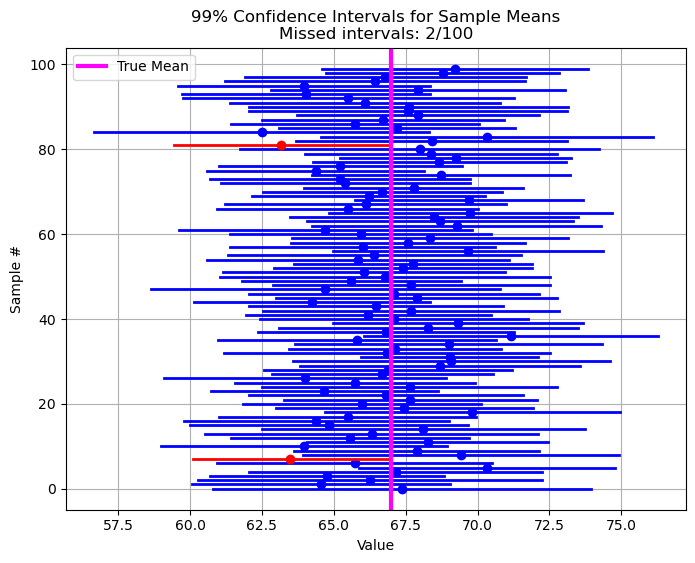

Out of 100 intervals, 2 did NOT contain the true mean.
This is roughly 2.0%, close to the expected 5% for a 95% CI.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def confidence_interval(N_samples=100, sample_size=30, true_mean=67, true_std=10, confidence=0.99):
    """
    Demonstrates 95% confidence intervals for the mean.
    Parameters:
    - N_samples: Number of independent samples (here 40)
    - sample_size: Number of observations per sample
    - true_mean: True population mean
    - true_std: True population standard deviation
    - confidence: Confidence level (default 0.95)
    """

    # WRITE_YOUR_CODE HERE TO COMPUTE THE Z VALUE
    # Z value for the two-tailed confidence interval
    alpha = 1-confidence
    z = norm.ppf(1-alpha/2)
    # this code block ends here

    # Store the lower and upper bounds of each CI
    ci_lowers = []
    ci_uppers = []

    # Track intervals that do NOT contain the true mean
    misses = 0

    # Generate samples and compute CIs
    for i in range(N_samples):
        sample = np.random.normal(loc=true_mean, scale=true_std, size=sample_size)

        # WRITE_YOUR_CODE HERE TO COMPUTE SAMPLE MEAN, SAMPLE STANDARD ERROR, AND CI BOUNDS
        sample_mean = sample.mean()
        sample_se = sample.std(ddof=1) / np.sqrt(sample_size)

        lower = sample_mean - z * sample_se
        upper = sample_mean + z * sample_se
        # this code block ends here

        # append to CI lists
        ci_lowers.append(lower)
        ci_uppers.append(upper)

        # WRITE_YOUR_CODE HERE TO CHECK IF THE TRUE MEAN IS WITHIN THE CI, INCREMENT misses IF NOT
        if not (lower <= true_mean <= upper):
            misses += 1
        # this code block ends here

    # Plot the CIs
    plt.figure(figsize=(8, 6))
    for i, (low, up) in enumerate(zip(ci_lowers, ci_uppers)):

        # WRITE_YOUR_CODE HERE TO cOLOR THE INTERVALS THAT MISS THE TRUE MEAN IN RED, OTHERS IN BLUE
        color = 'red' if not (low <= true_mean <= up) else 'blue'
        # this code block ends here

        plt.plot([low, up], [i, i], color=color, lw=2)
        plt.plot([np.mean([low, up])], [i], 'o', color=color)  # mark sample mean

    plt.axvline(true_mean, color='magenta', linestyle='-', label='True Mean', lw=3)
    plt.xlabel("Value")
    plt.ylabel("Sample #")
    plt.title(f"{confidence*100:.0f}% Confidence Intervals for Sample Means\nMissed intervals: {misses}/{N_samples}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # WRITE_YOUR_CODE HERE TO PRINT THE NUMBER OF MISSES AND THE PERCENTAGE
    miss_pct=(misses/N_samples)*100
    print(f"Out of {N_samples} intervals, {misses} did NOT contain the true mean.")
    print(f"This is roughly {miss_pct}%, close to the expected 5% for a 95% CI.")
    # this code block ends here

# ================================
# Run main if this script is executed
# ================================
if __name__ == "__main__":
    confidence_interval()

    plt.show() # do not comment this out